# ICEWS Aggregation

In [2]:
import os
from collections import defaultdict

# Other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Show plots inline
%matplotlib inline

## Get data

2004-2006 data

In [120]:
# Path to directory where the data is stored
DATA = "/Users/dmasad/Data/ICEWS/"
#years = [2004, 2005, 2006]
#years = [2004, 2005]
#years = [2004]
years = [2005, 2006]

In [121]:
all_data = []
for f in os.listdir(DATA): # Iterate over all files
    if f[7] != "2" or int(f[7:11]) not in years:  # Skip non-relevant files
        continue
    df = pd.read_csv(DATA + f, sep='\t', parse_dates=[1])
    all_data.append(df)

data = pd.concat(all_data)

In [122]:
cols = {col: col.replace(" ", "_") for col in data.columns}
data.rename(columns=cols, inplace=True)

In [123]:
# Select only Government-Government actions
data.Source_Sectors.fillna("", inplace=True)
data.Target_Sectors.fillna("", inplace=True)

gov = data[(data.Source_Sectors.str.contains("Government")) & 
           (data.Target_Sectors.str.contains("Government"))]
gov = gov[gov.Source_Country != gov.Target_Country]

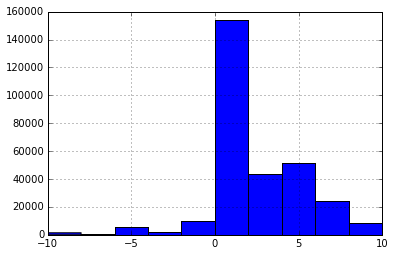

In [124]:
gov.Intensity.hist()

In [135]:
# Get negative dyads
negative_dyads = gov[gov.Intensity<0].groupby(["Source_Country", "Target_Country"])["Event_ID"] \
    .aggregate(len)

In [136]:
negative_dyads = negative_dyads.reset_index()


In [137]:
negative_dyads = negative_dyads[(negative_dyads.Source_Country != "") &
                               (negative_dyads.Target_Country != "")]

In [138]:
negative_dyads.sort("Event_ID", ascending=False).head(10)

,Source_Country,Target_Country,Event_ID
650,Israel,Occupied Palestinian Territory,505
1586,Venezuela,United States,430
247,China,Japan,384
452,Georgia,Russian Federation,302
1489,United States,Iraq,234
1190,South Korea,Japan,211
626,Iraq,United States,203
1548,United States,Venezuela,177
962,Occupied Palestinian Territory,Israel,169
1545,United States,United Kingdom,135


In [139]:
filename = "Negative_Dyads_" + str(min(years)) + "-" + str(max(years)) + ".csv"
print(filename)
negative_dyads.to_csv(filename)

Negative_Dyads_2005-2006.csv
